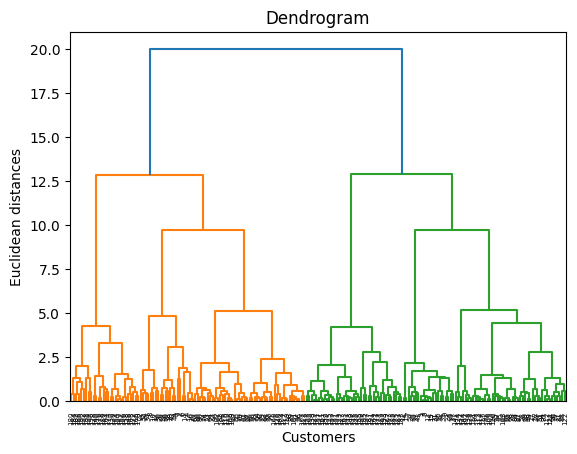

c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


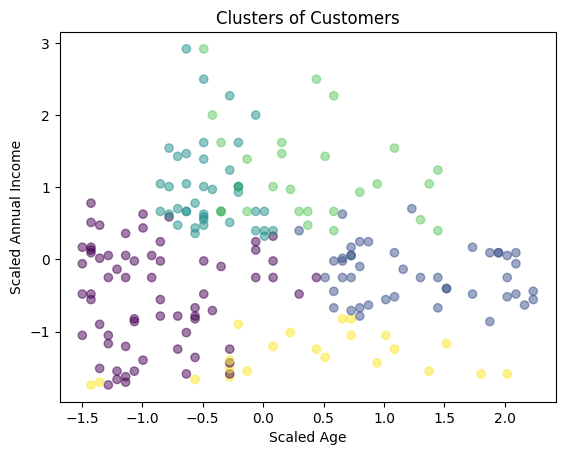

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load data
data = pd.read_csv('..\\dataset\\Mall_Customers.csv')

# Step 2: Feature selection
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Data preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Step 5: Determine the number of clusters
# From the dendrogram, we can observe the largest vertical distance that does not intersect any horizontal line,
# which is a reasonable threshold for the number of clusters
# In this case, let's choose 5 clusters

# Step 6: Fit hierarchical clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc.fit(X_scaled)
labels = hc.labels_

# Step 7: Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clusters of Customers')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.show()